Set default font size to make things look prettier

In [37]:
set(0,'defaultAxesFontSize',20)

# Taylor Series Example

Simple approximation to f(x)=exp(x)

In [38]:
clear; %% clear exisiting workspace

function y = taylor_exp(x,N)
    y=1.0;
    for n=1:N
        y = y + x.^n/factorial(n);
    end
end
    
taylor_exp(2,1)

ans =  3


Plot the approximation to f(x)

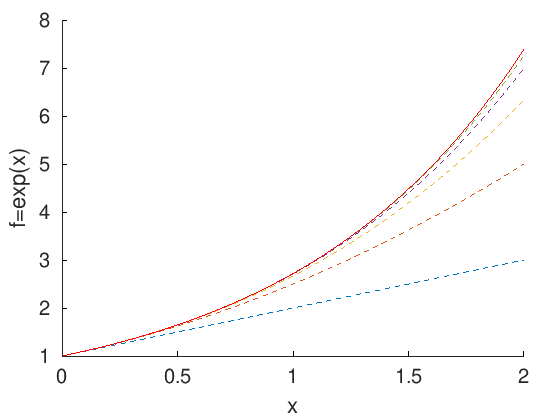

In [39]:
hold on
x = linspace(0,2,100);
for n=1:5
    plot(x,taylor_exp(x,n),'--')
end
xlabel('x')
ylabel('f=exp(x)')

plot(x,exp(x),'r')

Error for the approximation to f(x=2) as a function of the number of terms

x =  2


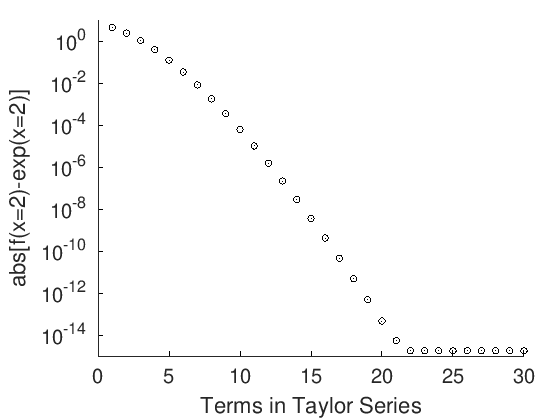

In [49]:
hold on
x=2
for n=1:30
    semilogy(n,abs(exp(x)-taylor_exp(x,n)),'ok')
end
xlabel('Terms in Taylor Series')
ylabel('abs[f(x=2)-exp(x=2)]')

# Simple Euler scheme example

t =  0.50000
yprime = -1
y =  0.50000
t =  1
yprime = -0.50000
y =  0.25000
t =  1.5000
yprime = -0.25000
y =  0.12500
t =  2
yprime = -0.12500
y =  0.062500


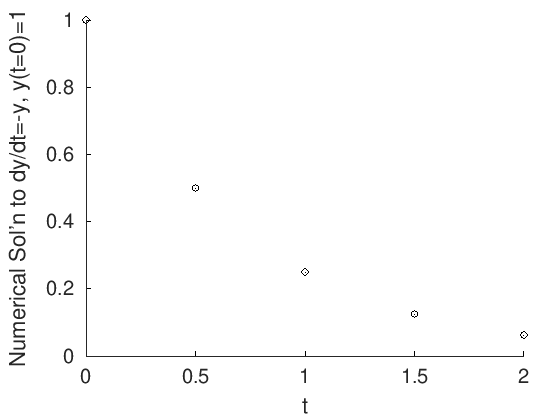

In [61]:
clear;
hold on;

y=1;
t=0;
plot(t,y,'ok')

dt=1/2;
tf=2;

while t<tf
    t=t+dt
    yprime=-y
    y=yprime*dt+y
    plot(t,y,'ok')
end

xlabel('t')
ylabel('Numerical Sol''n to dy/dt=-y, y(t=0)=1')

Let's compare to the real solution

t =  0.50000
yprime = -1
y =  0.50000
t =  1
yprime = -0.50000
y =  0.25000
t =  1.5000
yprime = -0.25000
y =  0.12500
t =  2
yprime = -0.12500
y =  0.062500


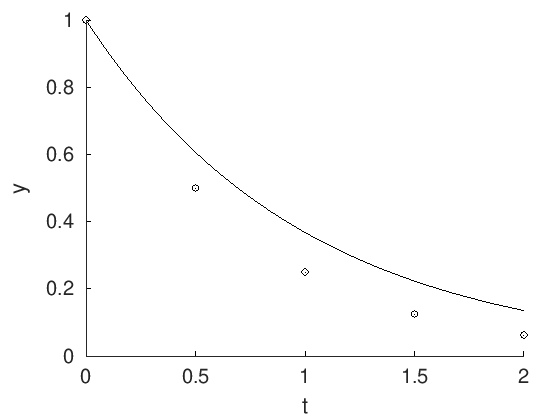

In [63]:
clear;
hold on;

y=1;
t=0;
plot(t,y,'ok')

dt=1/2;
tf=2;

while t<tf
    t=t+dt
    yprime=-y
    y=yprime*dt+y
    plot(t,y,'ok')
end

t=linspace(0,tf,100);

plot(t,exp(-t),'k-')
xlabel('t')
ylabel('y')

What happens if we change the step size?

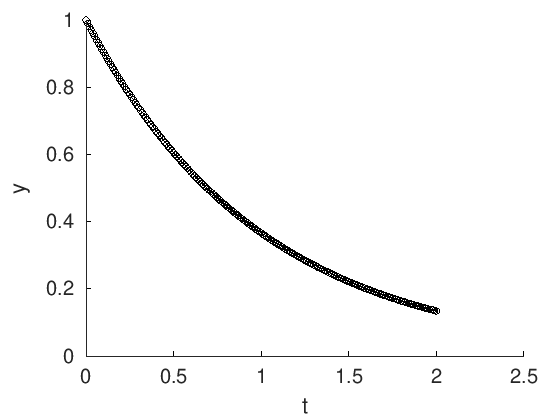

In [67]:
clear;
hold on;

y=1;
t=0;
plot(t,y,'ok')

dt=.01;
tf=2;

while t<tf
    t=t+dt;
    yprime=-y;
    y=yprime*dt+y;
    plot(t,y,'ok')
end

t=linspace(0,tf,100);

plot(t,exp(-t),'k-')
xlabel('t')
ylabel('y')

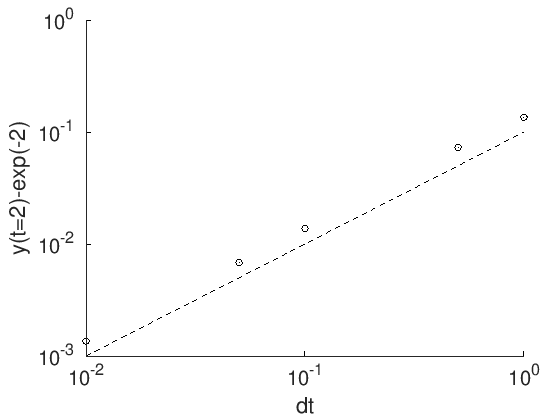

In [85]:
clear;
hold on;

function solve_example(dt)
    t=0;
    y=1;
    tf=2;

    while t<tf
        t=t+dt;
        yprime=-y;
        y=yprime*dt+y;
    end
    loglog(dt,abs(y-exp(-t)),'ok')
end

for dt=[1,.5,.1,.05,.01]
    solve_example(dt)
end

%% Plot a simple -1 log scaling to show the error drops
dt=logspace(-2,0);
plot(dt,dt/10,'k--')
xlabel('dt')
ylabel('y(t=2)-exp(-2)')

# Modified Euler (second order derivatives)

t =  0.50000
yprime = -1
yprimeprime =  1
y =  0.62500
t =  1
yprime = -0.62500
yprimeprime =  0.62500
y =  0.39062
t =  1.5000
yprime = -0.39062
yprimeprime =  0.39062
y =  0.24414
t =  2
yprime = -0.24414
yprimeprime =  0.24414
y =  0.15259


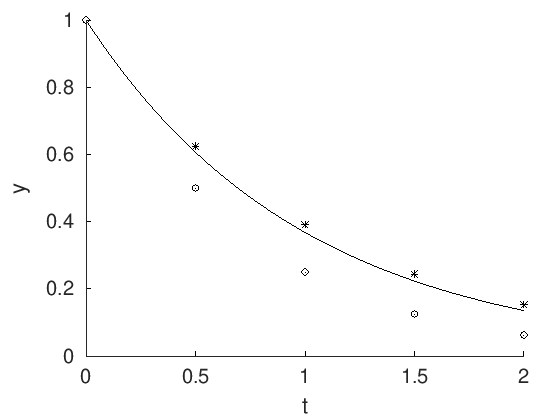

In [90]:
clear;
hold on;

%%Euler's method (for comparison)
y=1;
t=0;
plot(t,y,'ok')

dt=1/2;
tf=2;

while t<tf
    t=t+dt;
    yprime=-y;
    y=yprime*dt+y;
    plot(t,y,'ok')
end

t=linspace(0,tf,100);

plot(t,exp(-t),'k-')
xlabel('t')
ylabel('y')

%% Modified method
y=1;
t=0;
plot(t,y,'ok')

dt=1/2;
tf=2;

while t<tf
    t=t+dt
    yprime=-y
    yprimeprime=y
    y=y+yprime*dt+yprimeprime*dt^2/2
    plot(t,y,'*k')
end

t=linspace(0,tf,100);

plot(t,exp(-t),'k-')
xlabel('t')
ylabel('y')

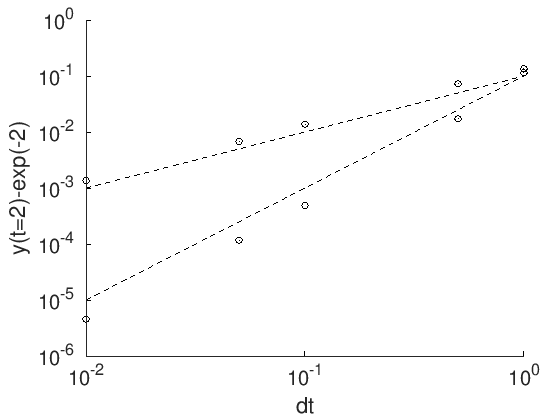

In [95]:
clear;
hold on;

function solve_example(dt)
    t=0;
    y=1;
    tf=2;

    while t<tf
        t=t+dt;
        yprime=-y;
        y=yprime*dt+y;
    end
    loglog(dt,abs(y-exp(-t)),'ok')
end

function solve_example_secondorder(dt)
    t=0;
    y=1;
    tf=2;

    while t<tf
        t=t+dt;
        yprime=-y;
        yprimeprime=y;
        y=y+yprime*dt+yprimeprime*dt^2/2;
    end
    loglog(dt,abs(y-exp(-t)),'ok')
end

for dt=[1,.5,.1,.05,.01]
    solve_example(dt)
    solve_example_secondorder(dt)
end

%% Plot a simple -1 log scaling to show the error drops
dt=logspace(-2,0);
plot(dt,dt/10,'k--')
plot(dt,dt.^2/10,'k--')

xlabel('dt')
ylabel('y(t=2)-exp(-2)')

Finally, let's see how far down we can push this. This will take a while.

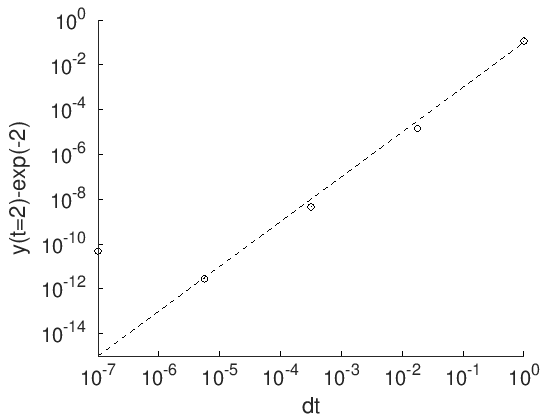

In [100]:
clear;
hold on;

function solve_example(dt)
    t=0;
    y=1;
    tf=2;

    while t<tf
        t=t+dt;
        yprime=-y;
        y=yprime*dt+y;
    end
    loglog(dt,abs(y-exp(-t)),'ok')
end

function solve_example_secondorder(dt)
    t=0;
    y=1;
    tf=2;

    while t<tf
        t=t+dt;
        yprime=-y;
        yprimeprime=y;
        y=y+yprime*dt+yprimeprime*dt^2/2;
    end
    loglog(dt,abs(y-exp(-t)),'ok')
end

for dt=logspace(-7,0,5)
    solve_example_secondorder(dt)
end

%% Plot a simple -1 log scaling to show the error drops
dt=logspace(-7,0);
plot(dt,dt.^2/10,'k--')

xlabel('dt')
ylabel('y(t=2)-exp(-2)')

# Mid-point method

t =  0.50000
yprime = -1
yN12 =  0.75000
yprimeN12 = -0.75000
y =  0.62500
t =  1
yprime = -0.62500
yN12 =  0.46875
yprimeN12 = -0.46875
y =  0.39062
t =  1.5000
yprime = -0.39062
yN12 =  0.29297
yprimeN12 = -0.29297
y =  0.24414
t =  2
yprime = -0.24414
yN12 =  0.18311
yprimeN12 = -0.18311
y =  0.15259


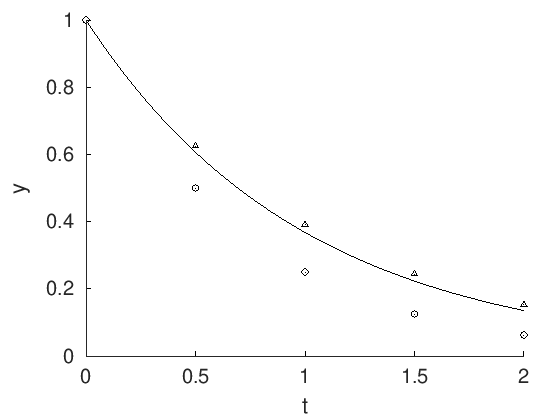

In [106]:
clear;
hold on;

%%Euler's method (for comparison)
y=1;
t=0;
plot(t,y,'ok')

dt=1/2;
tf=2;

while t<tf
    t=t+dt;
    yprime=-y;
    y=yprime*dt+y;
    plot(t,y,'ok')
end

t=linspace(0,tf,100);

plot(t,exp(-t),'k-')
xlabel('t')
ylabel('y')

%% Mid-point method
y=1;
t=0;
plot(t,y,'ok')

dt=1/2;
tf=2;

while t<tf
    t=t+dt
    yprime=-y
    yN12=y+dt/2*yprime
    yprimeN12=-yN12
    y=y+dt*yprimeN12
    plot(t,y,'>k')
end

t=linspace(0,tf,100);

plot(t,exp(-t),'k-')
xlabel('t')
ylabel('y')